# Unsupervised dimensionality reduction via principal component analysis (PCA)

(124, 13)


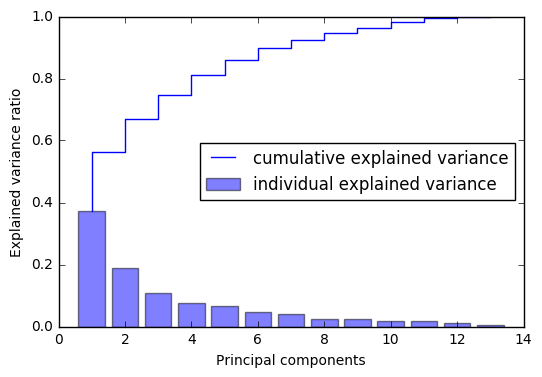

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# load wine data
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
X, y = df_wine.iloc[:, 1:14].values, df_wine.iloc[:, 0].values

# Normalize input
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

print X_train_std.shape

# calculate covariance
covariance_matrix = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(covariance_matrix)

# calculate variance_explained_ratio (is equal to eigen_val[i]/sum_of_eigen_values)
tot = np.sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse = True)]

# calculate cumulative sum of var_exp
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label = "individual explained variance")
plt.step(range(1,14), cum_var_exp, label='cumulative explained variance')
plt.legend(loc='best')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

PCA vs RandomForest:
we shall remind ourselves that PCA is an unsupervised method, which means that information about the class labels is ignored. Whereas a random forest uses the class membership information to compute the node impurities, variance measures the spread of values along a feature axis.

In [76]:
# calculate weight matrix using eigen vals:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print 'Weight Matrix [W] =\n', w

Weight Matrix [W] =
[[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


In [78]:
X_train_pca = X_train_std.dot(w)

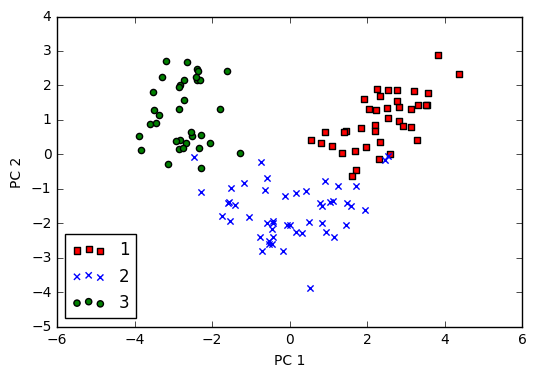

In [104]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m) 

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

# sci-kit PCA

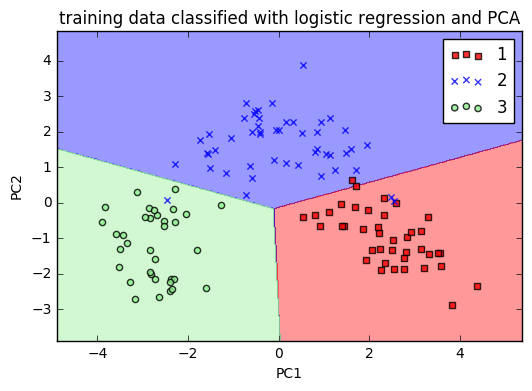

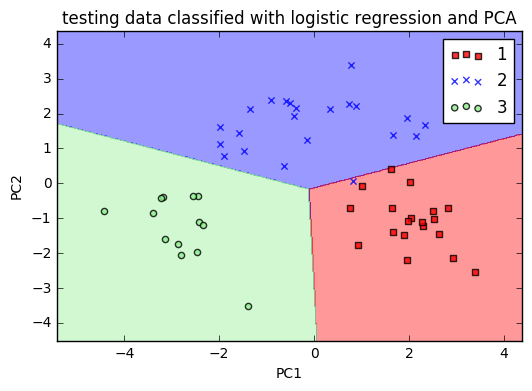

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

%run 'plot_decision_regions.ipynb'

pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)

# plot training data
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc = 'best')
plt.title('training data classified with logistic regression and PCA')
plt.show()

plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc = 'best')
plt.title('testing data classified with logistic regression and PCA')
plt.show()

In [111]:
# If we are interested in the explained variance ratios of the different principal components,
# we can simply initialize the PCA class with the n_components parameter set to None, 
# so all principal components are kept and the explained variance ratio can then be accessed
# via the explained_variance_ratio_ attribute:

pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])

In [ ]:
Q&A: wht is significance of:
<ul>find the directions of maximum variance? </ul>
<ul>covariance matrix? </ul>
<ul>bias variance trade off? </ul>
<ul>pca - othogonal component?</ul>
<ul></ul>